In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the required libraries
import os
import numpy as np
import pandas as pd
from datetime import date as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("C:/Users/chinna/Desktop/Data Science")

In [3]:
#Read data
uber = pd.read_csv("Uber.csv")
print(uber.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None


In [4]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Manipulating the data:

- It can be observed from the data that the timestamp columns (Request and Drop) are not in proper format. Therefore we will first convert them to datetime format.
- Getting the derieved variables required for analysis ie day, hour from Request timestamp
- Calculating the Travel time for the Trips Completed.
- The 24 hour distribution is done as below:
- Late Night : 00 – 04 hrs
- Morning : 04 – 07 hrs
- Day Time : 07 – 16 hrs
- Evening : 16 – 21 hrs
- Night : 21 – 00 hrs

In [5]:
#Replacing different formated dates
uber['Request timestamp'] = uber['Request timestamp'].str.replace("[/]","-")
uber['Drop timestamp'] = uber['Drop timestamp'].str.replace("[/]","-")

#Formatting datetime coloumns
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'], infer_datetime_format= True, dayfirst= True)
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'], infer_datetime_format= True, dayfirst= True)

#Extracting new columns hour and day for analysis
uber['Request hour'] = uber['Request timestamp'].dt.hour
uber['Request day'] = uber['Request timestamp'].dt.day

# Calculating the travel time of the trip
uber['Travel Time']=uber['Drop timestamp']-uber['Request timestamp']

uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request day,Travel Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,01:09:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,00:50:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,00:41:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,00:52:31


#### Checking the column types of the derived metrics.

In [6]:
print(uber.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Request hour         6745 non-null int64
Request day          6745 non-null int64
Travel Time          2831 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(2), timedelta64[ns](1)
memory usage: 474.3+ KB
None


### Analysis of each of the three Status to know the percentage of success and failed trips.

In [7]:
uber.groupby(['Status']).size()

Status
Cancelled            1264
No Cars Available    2650
Trip Completed       2831
dtype: int64

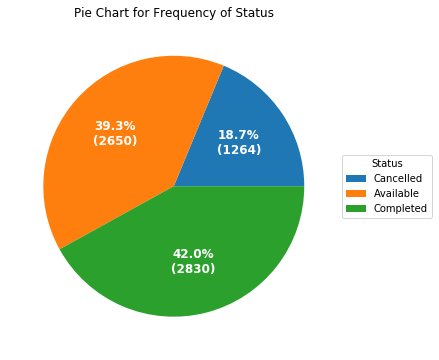

In [8]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

status = ["1264 Cancelled",
          "2650 No Cars Available",
          "2831 Trip Completed"]

data = [float(x.split()[0]) for x in status]
status_name = [x.split()[-1] for x in status]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, status_name,
          title="Status",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Pie Chart for Frequency of Status")

plt.show()

# 1. Visual Analysis of Data.

- We will now analyse the data for each pickup point and their status for each day and hour
- Then we will derieve some hypothesis we will further use for Demand Supply gap

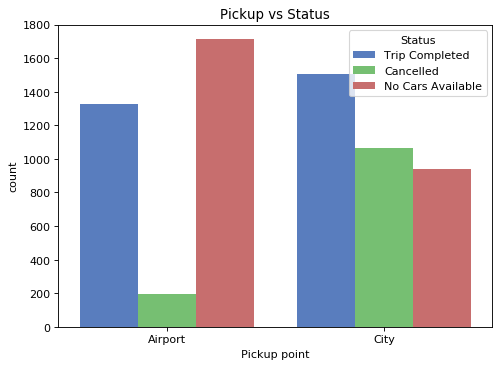

In [9]:
# Pickup VS Status
plt.figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
plt.title('Pickup vs Status')
sns.countplot(x='Pickup point', hue='Status', data=uber, palette="muted")
plt.show()

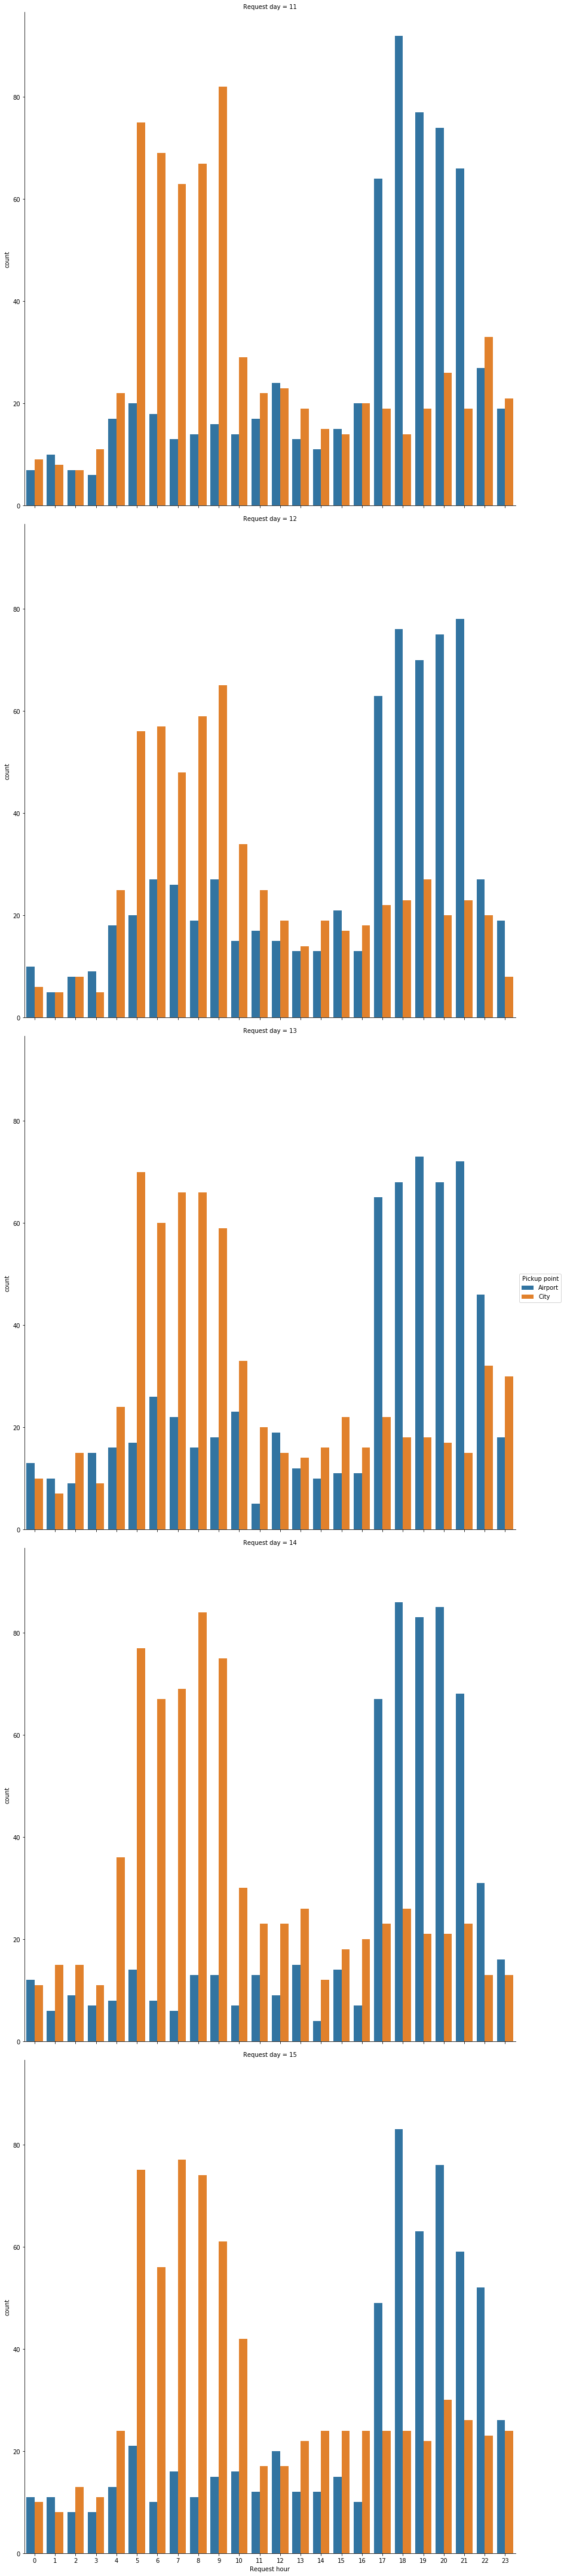

In [10]:
#Every day analysis of data
sns.factorplot(x = "Request hour", hue = "Pickup point", row = "Request day", data = uber, kind = "count", size = 12)
plt.show()

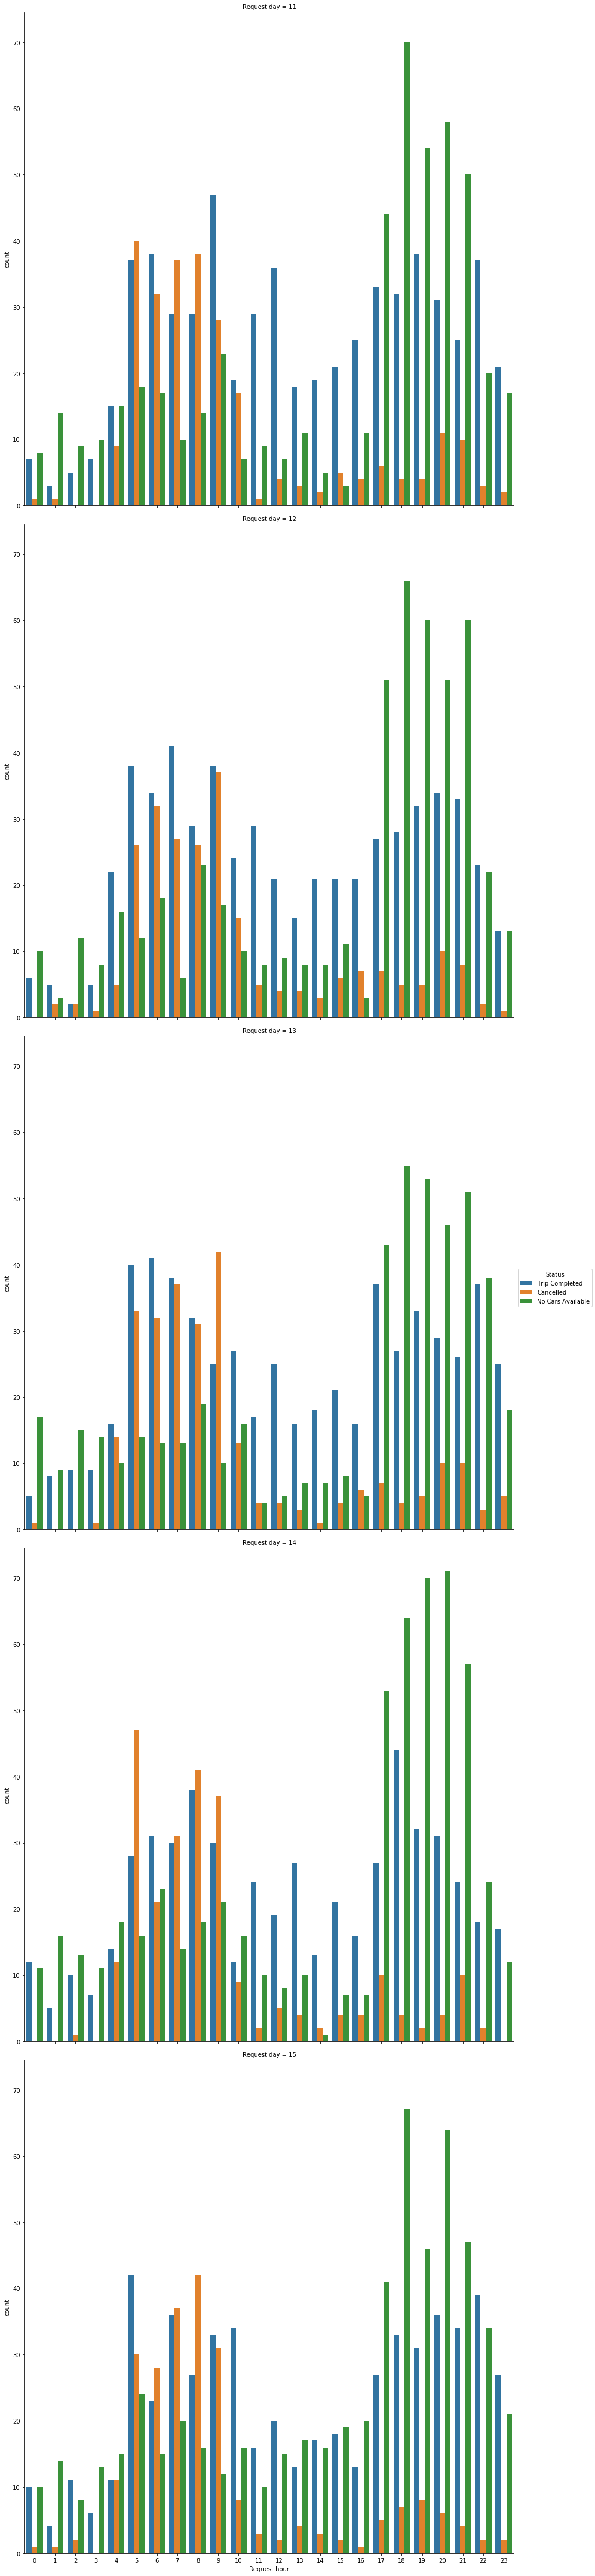

In [11]:
#Everyday analysis of status
sns.factorplot(x = "Request hour", hue = "Status", row = "Request day", data = uber, kind = "count", size = 12)
plt.show()

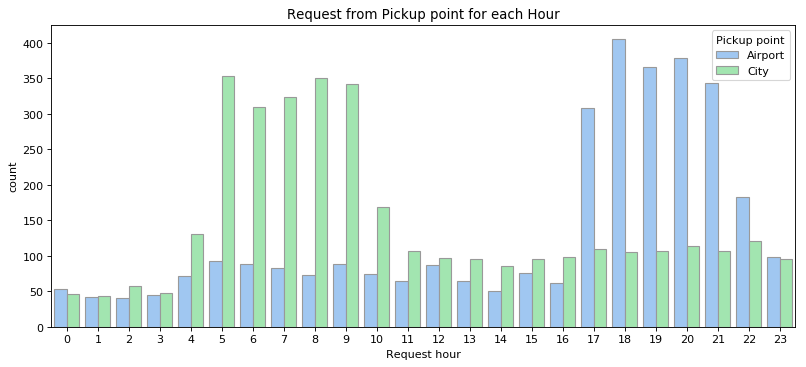

In [12]:
#Overall Each Hour w.r.t Pickup Points
plt.figure(figsize = (12,5), dpi=80, facecolor='w')
plt.title("Request from Pickup point for each Hour")
sns.countplot(x="Request hour", hue="Pickup point",
            palette="pastel", edgecolor=".6", 
            data=uber)
plt.show()

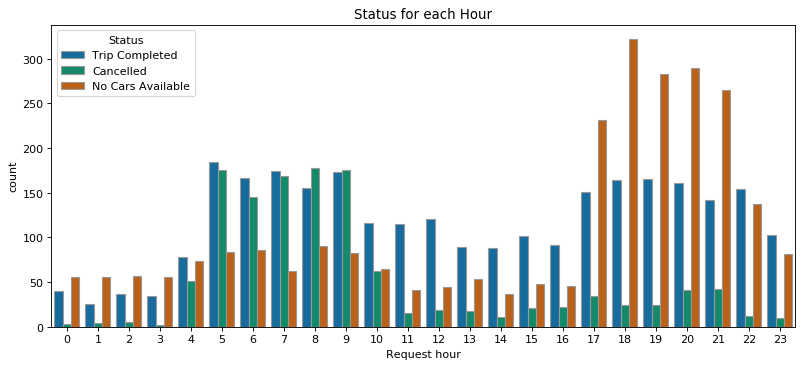

In [13]:
#Overall Each Hour w.r.t status
plt.figure(figsize = (12,5), dpi=80, facecolor='w')
plt.title("Status for each Hour")
sns.countplot(x="Request hour", hue="Status", 
            palette="colorblind", edgecolor=".6",
            data=uber)
plt.show()

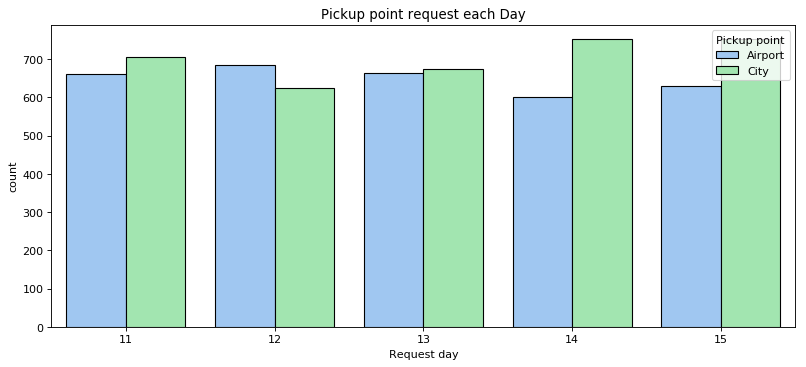

In [14]:
plt.figure(figsize = (12,5), dpi=80, facecolor='w')
plt.title("Pickup point request each Day")
sns.countplot(x="Request day", hue="Pickup point",
            palette="pastel", edgecolor="k",
            data=uber)
plt.show()

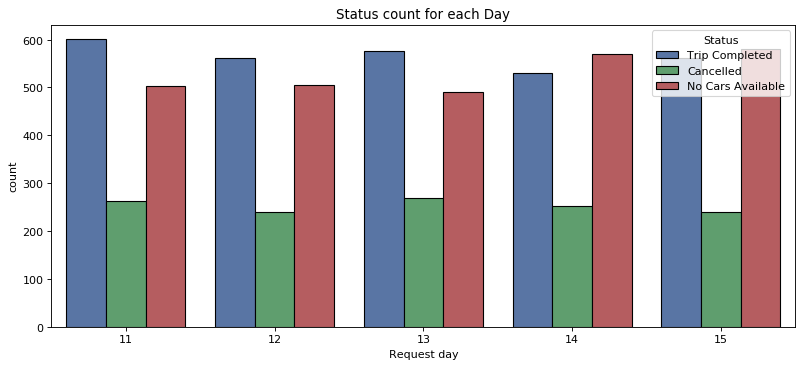

In [15]:
plt.figure(figsize = (12,5), dpi=80, facecolor='w')
plt.title("Status count for each Day")
sns.countplot(x="Request day", hue="Status",
            palette="deep", edgecolor="k",
            data=uber)
plt.show()

## Converting hours to certain categories for Analysis

In [16]:
#Function to define slots
def slots(x):
    category = ""
    if x >= 0 and x < 5:
        category = "Late Night"
    elif x >= 5 and x < 10:
        category = "Early Morning"
    elif x >= 10 and x < 17:
        category = "Day time"
    elif x >= 17 and x < 22:
        category = "Evening"
    else:
        category = "Night"
    return category

uber['Time Slot'] = uber.apply(lambda x:slots(x['Request hour']), axis = 1)
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request day,Travel Time,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,01:09:00,Day time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,00:50:00,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,00:41:00,Early Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,00:55:00,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,00:52:31,Early Morning


In [17]:
uber.groupby(['Time Slot']).size()

Time Slot
Day time         1224
Early Morning    2103
Evening          2342
Late Night        578
Night             498
dtype: int64

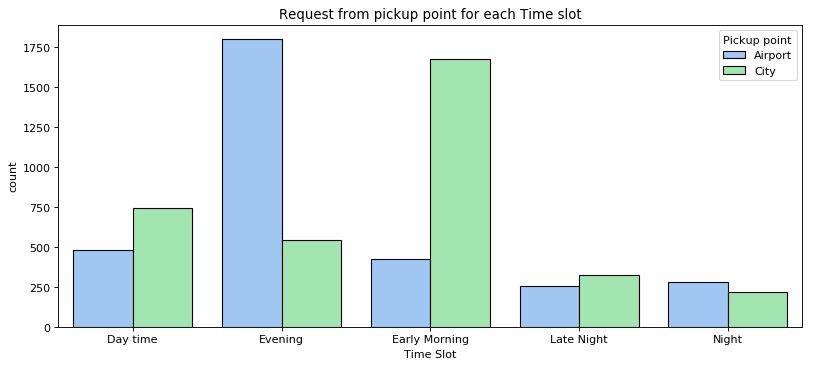

In [18]:
plt.figure(figsize = (12,5), dpi=80, facecolor='w')
plt.title("Request from pickup point for each Time slot")
sns.countplot(x="Time Slot", hue="Pickup point",
            palette="pastel", edgecolor="k",
            data=uber)
plt.show()

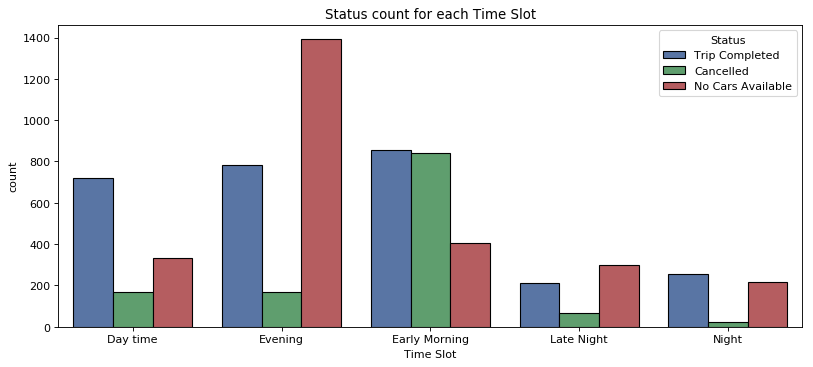

In [19]:
plt.figure(figsize = (12,5), dpi=80, facecolor='w')
plt.title("Status count for each Time Slot")
sns.countplot(x="Time Slot", hue="Status",
            palette="deep", edgecolor="k",
            data=uber)
plt.show()

### Calcuating the Supply-Demand Gap for Uber

#### Demand : Total Requests received.
#### Supply : Total Trips Completed.

In [20]:
# Generating a datframe for Supply-Demand
Supply_Demand= uber.groupby('Time Slot')['Request timestamp','Drop timestamp'].count()
Supply_Demand.columns=['Demand','Supply']
Supply_Demand=Supply_Demand.reset_index()

# Changing the type of resetted-index from category to object
Supply_Demand['Time Slot']=Supply_Demand['Time Slot'].astype('object')

#Inspecting the data frame
Supply_Demand 

,Time Slot,Demand,Supply
0,Day time,1224,722
1,Early Morning,2103,854
2,Evening,2342,784
3,Late Night,578,214
4,Night,498,257


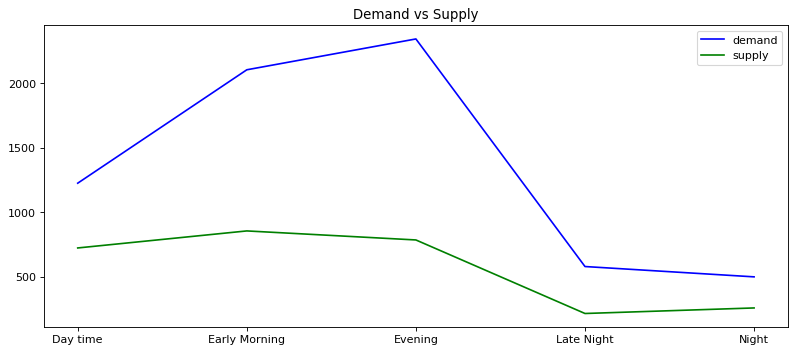

In [21]:
#Plotting the Dataframe
plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')

#Plotting as a line-chart as the distance between lines clearly shows the gap between two values.
plt.title('Demand vs Supply')
plt.plot(Supply_Demand['Time Slot'],Supply_Demand['Demand'] , color='b', label='demand')
plt.plot(Supply_Demand['Time Slot'],Supply_Demand['Supply'] , color='g', label='supply')

plt.legend()
plt.show()

## Supply_Demand for each pick-up point

In [22]:
# Calculating the Supply_Demand for City-to-Airport Route
Supply_Demand_City= uber.loc[(uber["Pickup point"]=='City'),:].groupby("Time Slot")['Request timestamp','Drop timestamp'].count()
Supply_Demand_City.columns=['Demand','Supply']

Supply_Demand_City=Supply_Demand_City.reset_index()

#changing the type of "Time Slot" from category to ibject for graph plotting
Supply_Demand_City['Time Slot']=Supply_Demand_City['Time Slot'].astype('object')

Supply_Demand_City

,Time Slot,Demand,Supply
0,Day time,746,395
1,Early Morning,1677,472
2,Evening,542,411
3,Late Night,325,111
4,Night,217,115


In [23]:
# Calculating the Supply_Demand for Airport-to-City Route
Supply_Demand_Airport= uber.loc[(uber["Pickup point"]=='Airport'),:].groupby("Time Slot")['Request timestamp','Drop timestamp'].count()
Supply_Demand_Airport.columns=['Demand','Supply']

Supply_Demand_Airport=Supply_Demand_Airport.reset_index()

#changing the type of "Time-slot" from category to ibject for graph plotting
Supply_Demand_Airport['Time Slot']=Supply_Demand_Airport['Time Slot'].astype('object')

Supply_Demand_Airport

,Time Slot,Demand,Supply
0,Day time,478,327
1,Early Morning,426,382
2,Evening,1800,373
3,Late Night,253,103
4,Night,281,142


# Supply v/s Demand
- We can clearly see that there is a huge difference between supply and demand for:
 - City having supply shortage on Early Mornings
 - Airport having supply shortage on Evenings

In [24]:
# create pie charts instead of a count plots
def pie_chart(dataframe):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    
    sizes = dataframe['Status'].values
    status_name = dataframe.index.values    
    
    fig1, ax1 = plt.subplots()
    wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90, 
                                       textprops=dict(color="w"))
    ax1.legend(wedges, status_name,
          title="Status",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax1.set_title("Pie Chart for Supply Demand Gap")
 
    plt.show()

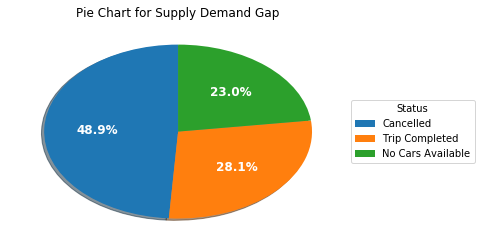

In [25]:
# percentage breakup of status on the basis of pickup location
uber_city = uber.loc[(uber["Pickup point"] == "City") & (uber['Time Slot'] == "Early Morning")]
uber_city_count = pd.DataFrame(uber_city.Status.value_counts())
pie_chart(uber_city_count)

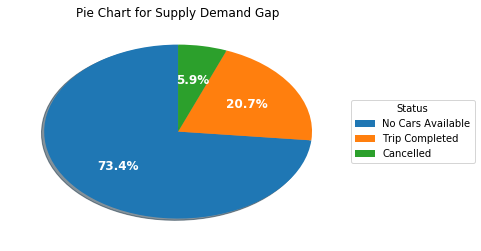

In [26]:
# Status of trips @ Evening Rush where pickup point is Airport
uber_airport = uber.loc[(uber["Pickup point"] == "Airport") & (uber['Time Slot'] == "Evening")] 
uber_airport_count = pd.DataFrame(uber_airport.Status.value_counts())
pie_chart(uber_airport_count)

### The following observations can be made from the above figures:

- For City-to-Airport rides, the maximum gap exists during the Early Morning i.e. a person is least likely to get a cab to Airport at this time.

- For Airpot-to-City rides, the maximum gap exists during the Evening until night i.e. a person is least likely to get a cab at this time.

In [28]:
uber.to_csv("uber.csv", index = False)